In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import helpers.processing_helpers as ph
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sb
from collections import Counter


In [2]:
df_dev = pd.read_csv("./dataset/development.csv")

In [3]:
# Checking for NaN values

nan_stats = df_dev.isna().any(axis=0)

print(nan_stats.sum()) # -> there are no NaN values

0


In [5]:
noise_indexes = [0,7,12,15,16,17]
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

noise_removed = df_dev.drop(columns=ph.get_column_names(features, noise_indexes))

noise_removed = noise_removed.drop(columns=ph.get_column_names(['tmax', 'rms'], acc_idxs))

In [6]:
y_train_valid = noise_removed[['x', 'y']].copy()

X_train_valid = noise_removed.drop(columns=['x', 'y'])

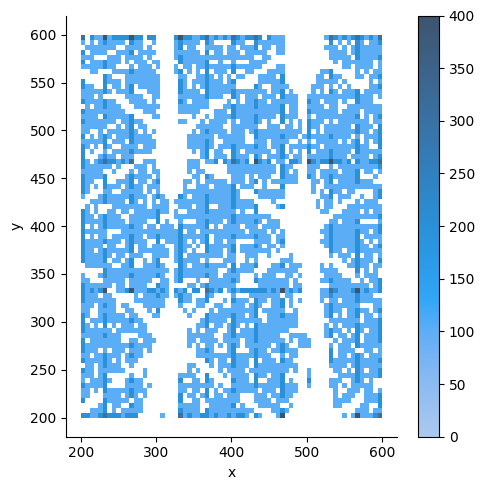

In [7]:
# Lets look at the distribution of the x,y values

sb.displot(x=y_train_valid['x'], y=y_train_valid['y'], cbar=True)

In [23]:
string_rep = y_train_valid[['x', 'y']].astype(str).agg(','.join, axis=1)
Counter(sorted(string_rep.value_counts(), reverse=True))

Counter({100: 3855})

From the displot it looks like there is some difference in the distribution of the points. It especially looks like there is some kind of square grid pattern of darker blue all over the sensor. But at further inspection it looks like there is an even distribution of points, that is, 100 examples per point in the green square.